
#Customer Personality Analysis
---



#Definição do problema
##Objetivo: entender e descrever claramente o problema que está sendo resolvido.

O problema de analise de personalidade de clientes é um projeto importante para entender o público alvo de determinado produto e assim determinar qual seria a melhor forma de aumentar as vendas desse produto direcionando as estratégias para esse público alvo. Portanto trata-se de uma tarefa de segmentação, onde queremos separar esses grupos de clientes. A ideia é após a etapa de pré-processamento e análise, aplicar técnicas de aprendizado não supervisionado como clustering para a segmentação. Os dados foram pegos no [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download). Os atributos estão apresentados abaixo em uma única tabela:

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

Hípoteses Iniciais:

A premissa inicial dos produtos disponíveis é que os usuários de vinhos são um público mais velho e com maior renda, por ser um produto mais caro. Sobre frutas, carne e peixe não possuo hipóteses a priori. Outra hipótese é que a maioria dos clientes com gasto em ouro possui um parceiro.



Importação de bibliotecas necessarias para análise.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler
import os

Carregamento e prévio entendimento dos dados

In [55]:
df = pd.read_csv(os.path.join("..","data", "marketing_campaign.csv"), sep='\t')
print(df.shape)
df.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [56]:
# Verificação de tipagem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [57]:
# Estatisticas básicas dos dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [58]:
# Verificação de dados faltantes
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [59]:
df.duplicated().sum()

0

## Análise exploratória inicial

- Dimensão: O dataset possui 2240 linhas e 29 colunas

- Tipagem: O dataset possui 25 colunas inteiras, 3 coluanas categoricas(marital_status, education, Dt_costumer) e 1 coluna float(income)

- Duplicatas: O dataset não possui duplicatas

- Valores Faltantes: A coluna income possui 24 linhas com valores faltantes

- Outliers: Possivel outliers presente na coluna income devido à alta variância.

- Outros: Existe duas colunas(Z_CostContact, Z_Revenue) no dataset sem informação sobre. Pelo desvio padrão, média, máx e min é possível observar que os valores delas se repetem em todas as linhas.

#Pré-processamento inicial

In [60]:
# Remoção de atributos desnecessários como o ID e colunas com dados repetidos

df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [61]:
# Vamos analisar as variáveis categoricas

categorical_columns = df.select_dtypes('object')

for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(value_counts)
    print("\n")

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64




In [62]:
# É possível observar que coluna Education pode ser reduzida em Básica, Graduação e Pós-Graduação
# A coluna Marital possui valores que podem ser reduzidos somente à com parceiro ou sem parceiro afim de melhorar a análise

df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')
df['Education'] = df['Education'].replace(['PhD', 'Master'], 'Postgraduated')
df['Education'] = df['Education'].replace(['2n Cycle', 'Graduation'], 'Graduated')
df['Education'] = df['Education'].replace(['Basic'], 'Basic')

In [63]:
# Ainda, pra reduzir a dimensionalidade dos dados vamos juntar algumas colunas pois a alta granulidade não será tão interessante para a análise
# E adicionar uma coluna que é a soma das compras

df['Children'] = df['Kidhome'] + df['Teenhome']
df['MntProducts'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['AggregatedAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df = df[[col for col in df.columns if col not in ['Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]]
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Children', 'MntProducts', 'AggregatedAcceptedCmp', 'TotalPurchases'],
      dtype='object')

In [64]:
# Como não temos a data exata do nascimento, podemos estimar a idade do consumidor com um erro de no máximo 12 meses, o que nos dá uma estimativa que pode ser útil para à análise.
# Vamos dividir em 5 categorias

ano_atual = datetime.datetime.now().year

# Calculando a idade de cada cliente
df['Age'] = ano_atual - df['Year_Birth']

# Definindo categorias de faixa etária
bins = [0, 18, 30, 45, 60, 100]
labels = ['Minor', 'Young Adult', 'Adult', 'Middle Age', 'Elderly']

# Criando uma nova coluna de categorias
df['Age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False).astype('object')
df.drop(['Age', 'Year_Birth'], axis=1, inplace=True)
df.head()

<ipython-input-64-5333149eff13>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = ano_atual - df['Year_Birth']
<ipython-input-64-5333149eff13>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False).astype('object')
<ipython-input-64-5333149eff13>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Children,MntProducts,AggregatedAcceptedCmp,TotalPurchases,Age_category
0,Graduated,Single,58138.0,04-09-2012,58,635,88,546,172,88,...,10,4,7,0,1,0,1617,0,25,Elderly
1,Graduated,Single,46344.0,08-03-2014,38,11,1,6,2,1,...,1,2,5,0,0,2,27,0,6,Elderly
2,Graduated,Partner,71613.0,21-08-2013,26,426,49,127,111,21,...,2,10,4,0,0,0,776,0,21,Middle Age
3,Graduated,Partner,26646.0,10-02-2014,26,11,4,20,10,3,...,0,4,6,0,0,1,53,0,8,Adult
4,Postgraduated,Partner,58293.0,19-01-2014,94,173,43,118,46,27,...,3,6,5,0,0,1,422,0,19,Adult


In [65]:
# Vamos retirar as linhas com valores faltantes relativos à income
# Como não há duplicatas não será necessário retirá-las

df.dropna(inplace=True)
df.shape

<ipython-input-65-6ad79bffb604>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


(2213, 23)

In [66]:
# Segundo minha premissa inicial era provavel que o dataset teria outliers principalemente na coluna de income
# Para se confirmar isso vamos fazer a detecção de outliers com o método do z-score

# Calculate the z-scores for each column

bin_col = [col for col in df.columns if df[col].nunique() == 2]
cat_col = [col for col in df.columns if 2 < df[col].nunique() < 10]
num_col = [col for col in df.select_dtypes(include=['number']).columns
                     if col not in bin_col + cat_col]

z_scores = pd.DataFrame(stats.zscore(df[num_col]), columns=num_col)

# Generate descriptive statistics for the z-scores
display(z_scores.describe().round(3))
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the rows containing outliers
df = df.drop(outliers.index)
df.shape

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntProducts,TotalPurchases
count,2213.000,2213.000,2213.000,2213.000,2213.000,2213.000,2213.000,2213.000,2213.000,2213.000,2213.000,2213.000,2213.000,2213.000,2213.000
mean,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.006,-1.694,-0.905,-0.663,-0.745,-0.687,-0.658,-0.850,-1.209,-1.491,-0.913,-1.786,-2.195,-0.999,-1.942
25%,-0.675,-0.864,-0.834,-0.612,-0.673,-0.633,-0.634,-0.675,-0.689,-0.762,-0.913,-0.863,-0.958,-0.893,-0.898
50%,-0.034,-0.000,-0.386,-0.461,-0.441,-0.468,-0.463,-0.385,-0.169,-0.032,-0.229,-0.248,0.280,-0.349,0.014
75%,0.646,0.864,0.593,0.168,0.290,0.226,0.145,0.234,0.351,0.698,0.454,0.675,0.692,0.732,0.797
max,24.408,1.728,3.522,4.347,6.950,4.043,5.720,5.361,6.588,8.359,8.655,2.214,6.054,3.184,3.796


(1951, 23)

Ao fim do processo de pré-processamento inicial temos:

- Junção de colunas categoricas, criação de novas colunas informativas e eliminação de colunas desnecessárias.

- Detecção e remoção de outilers

# Visualização

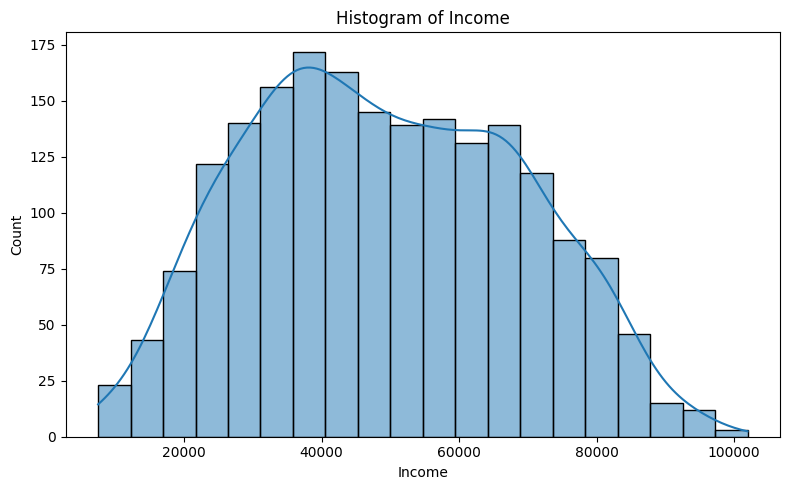

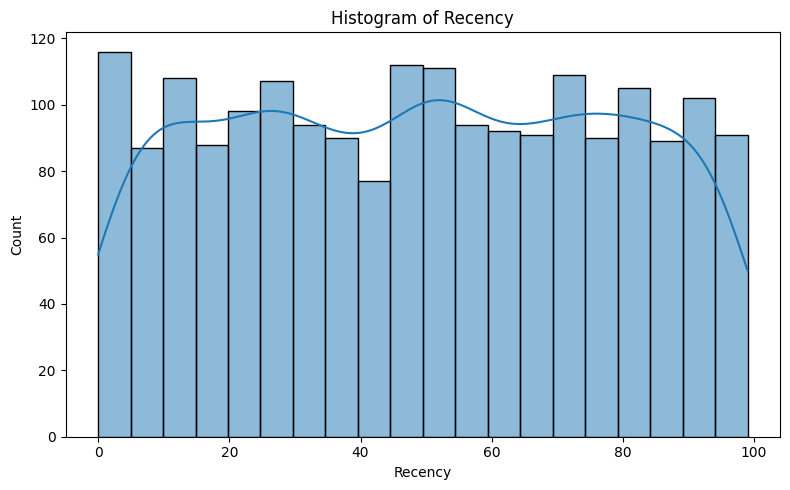

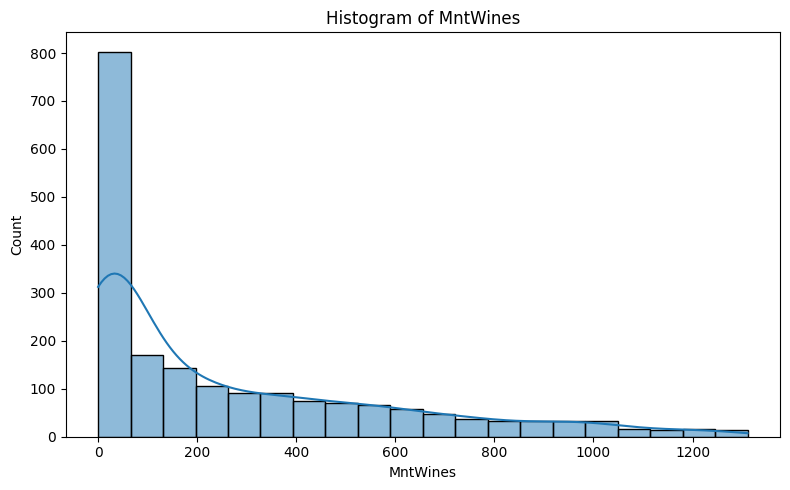

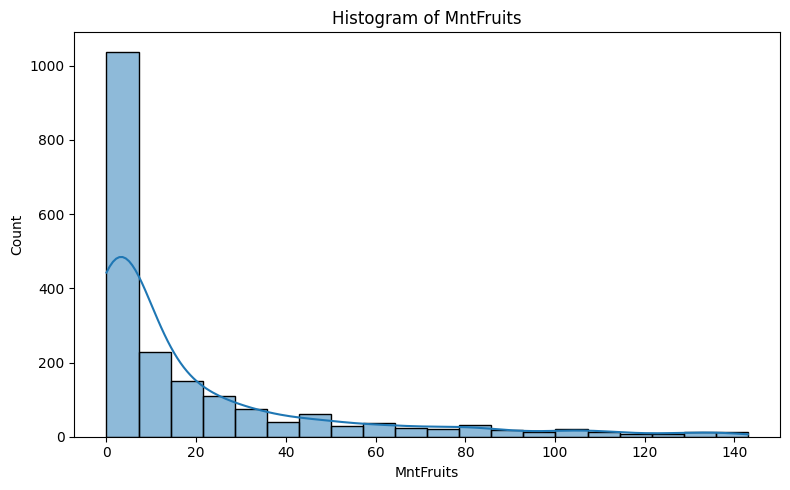

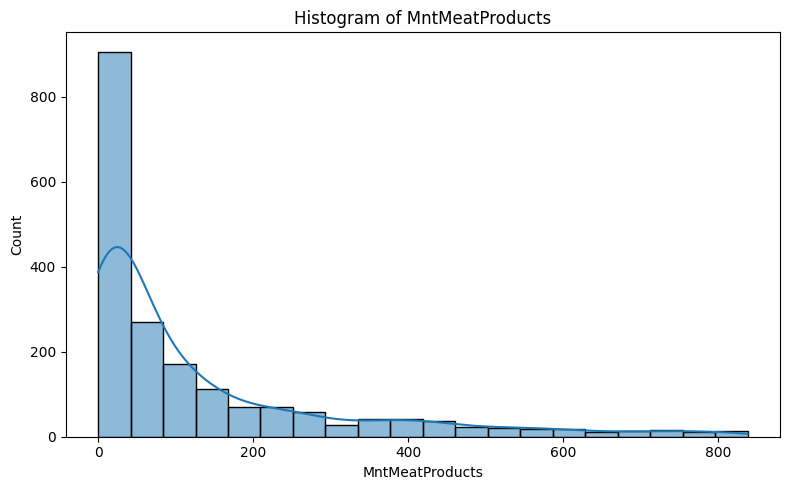

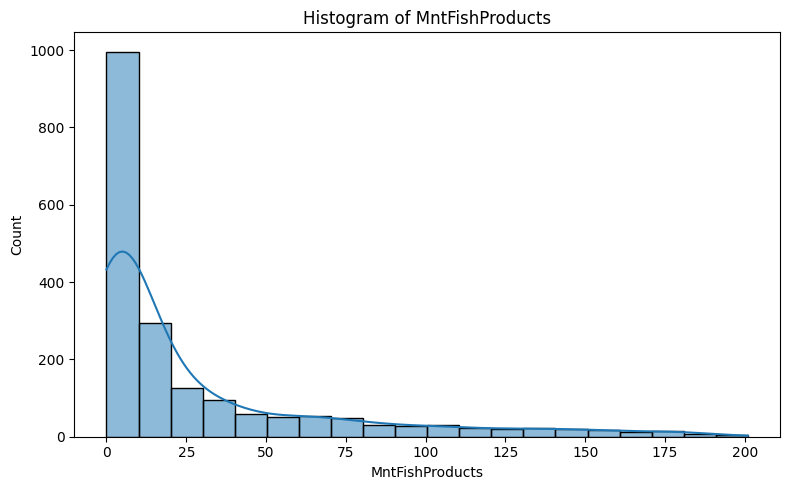

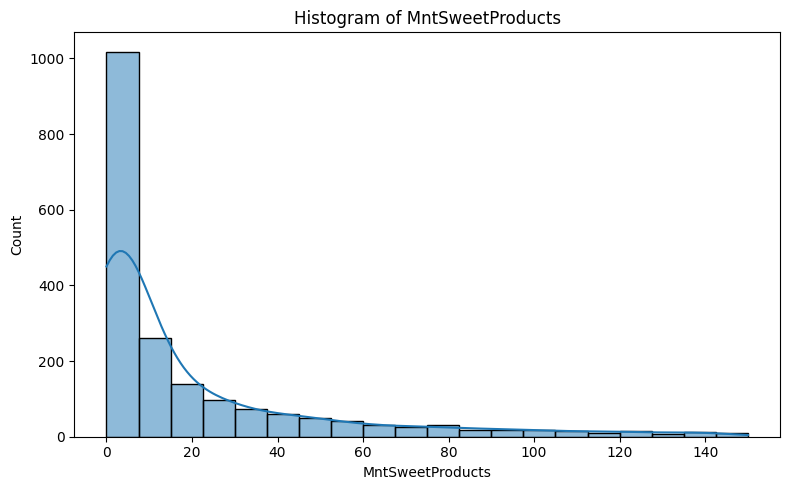

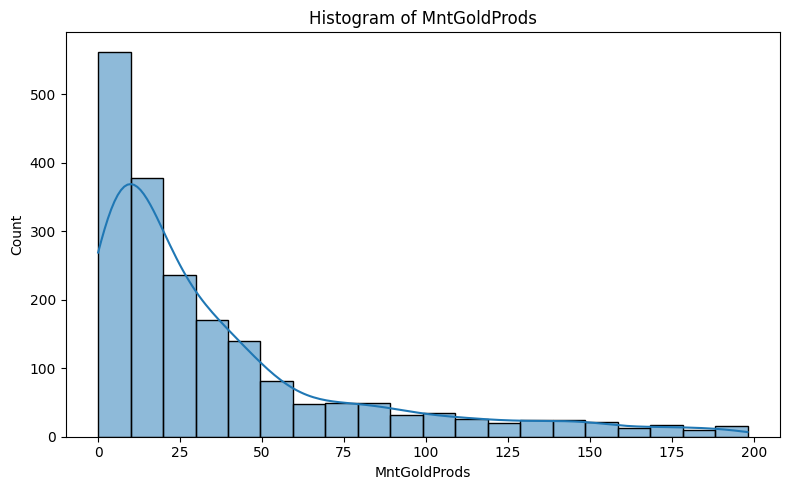

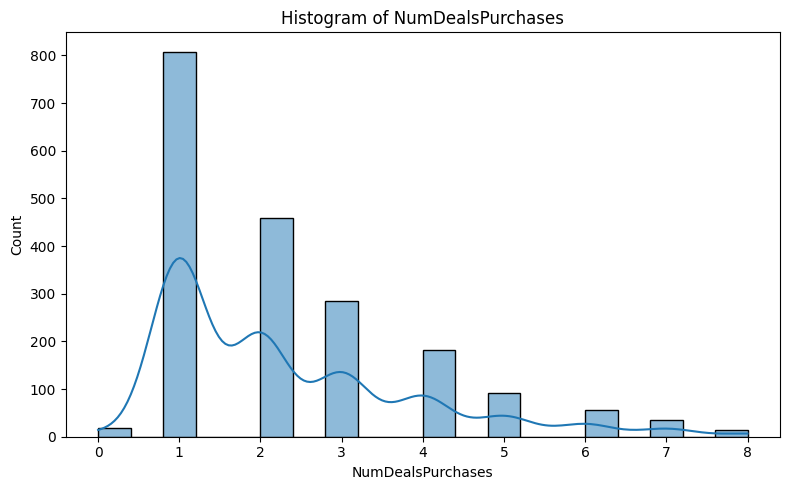

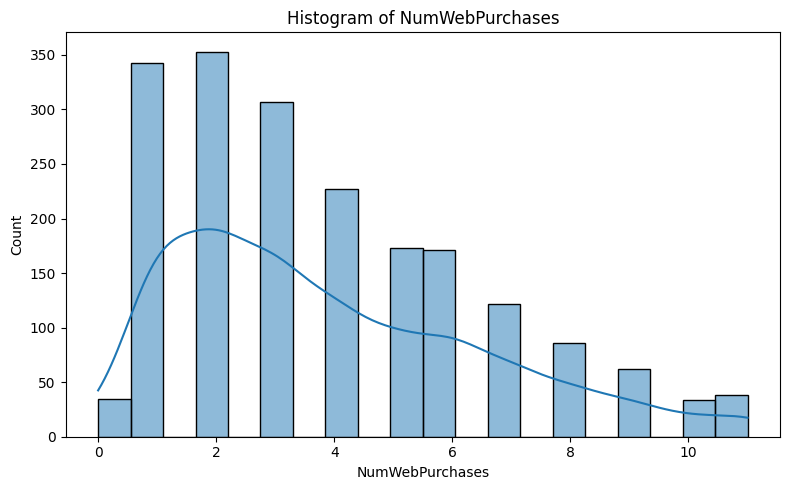

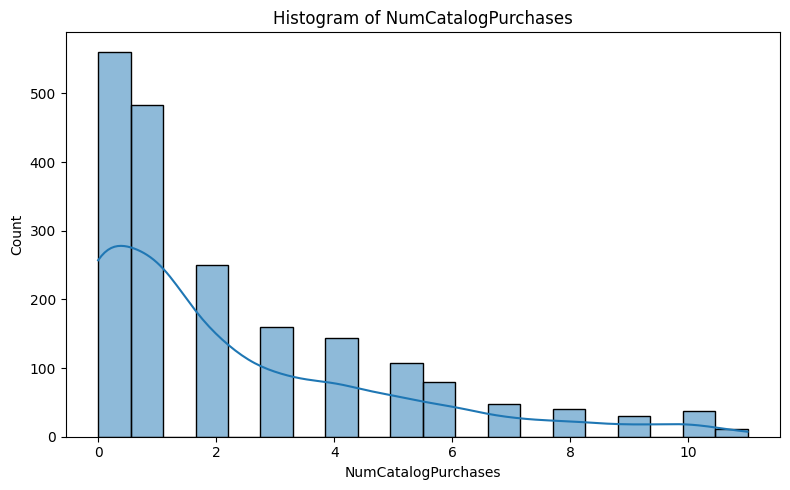

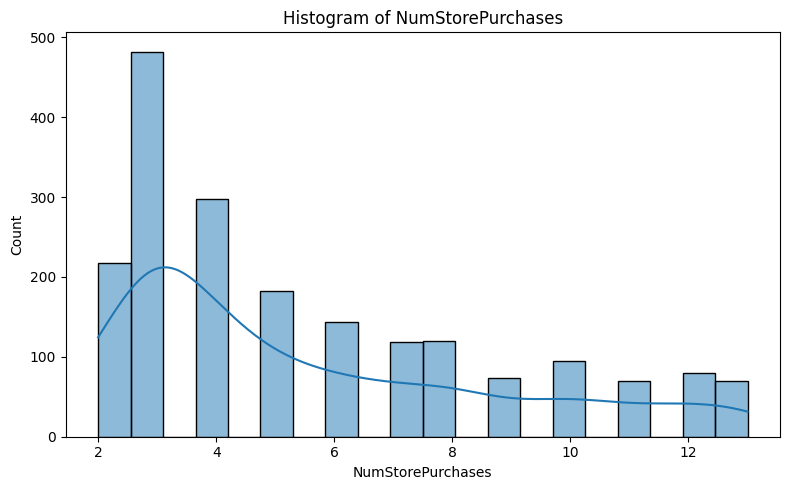

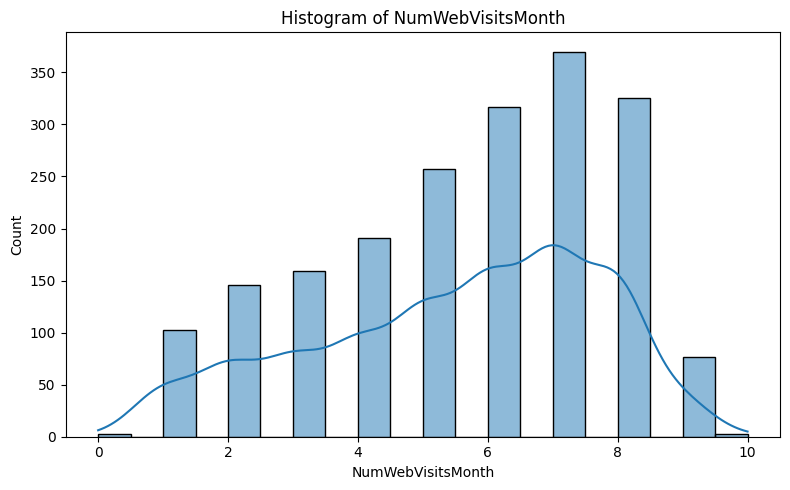

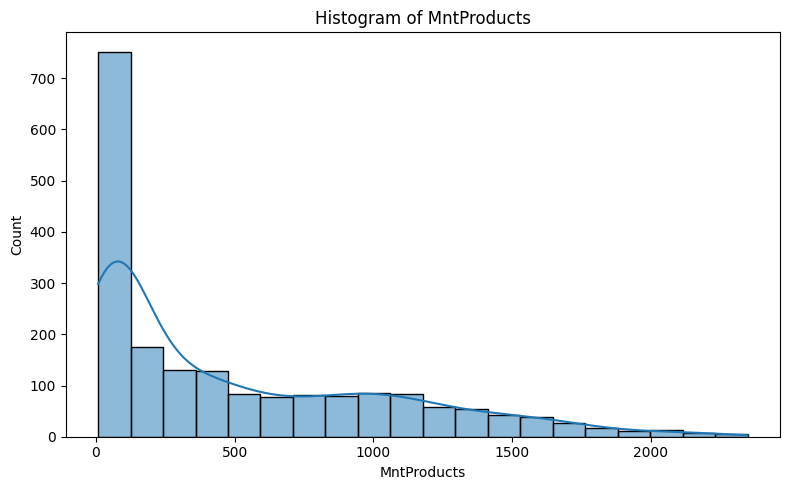

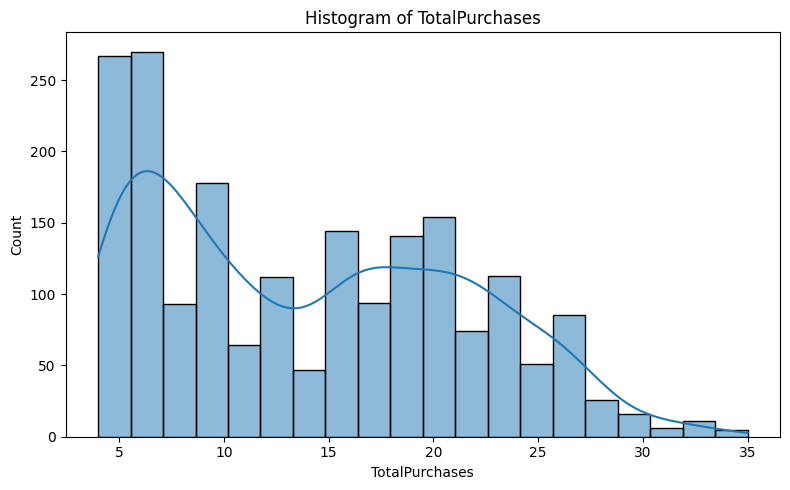

In [67]:
# Vamos plotar o histograma de cada coluna numérica

for column in num_col:

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

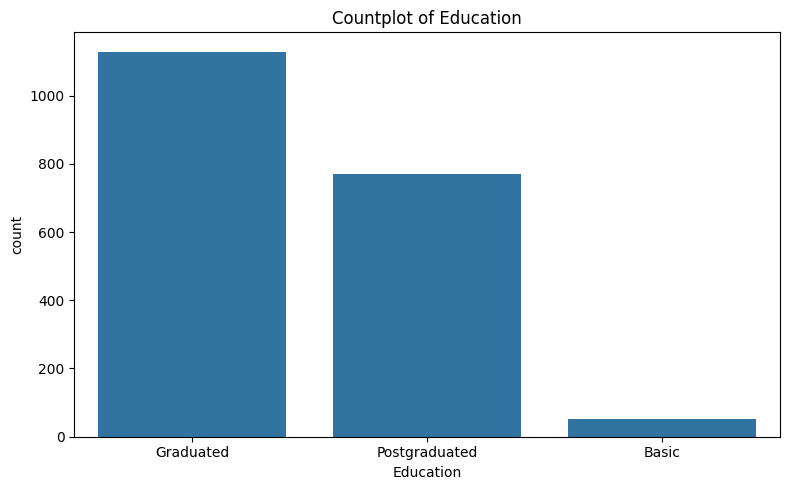

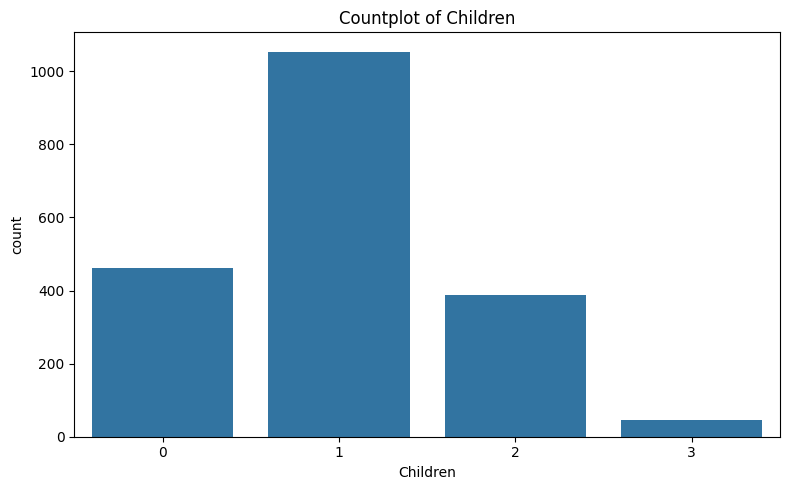

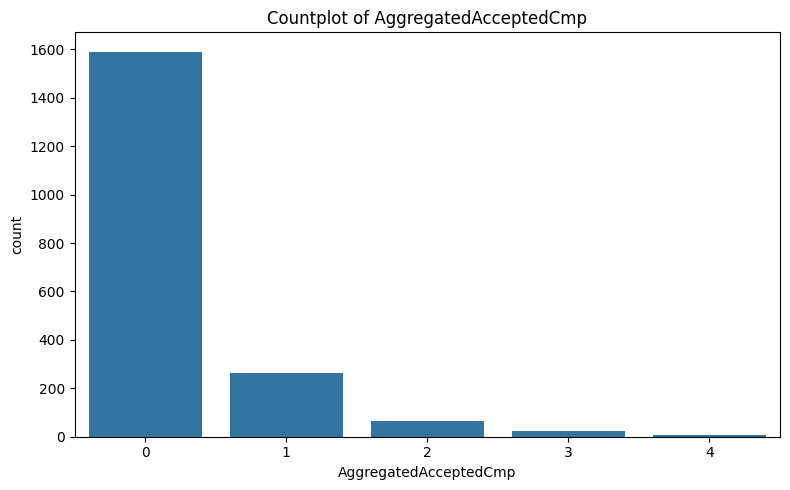

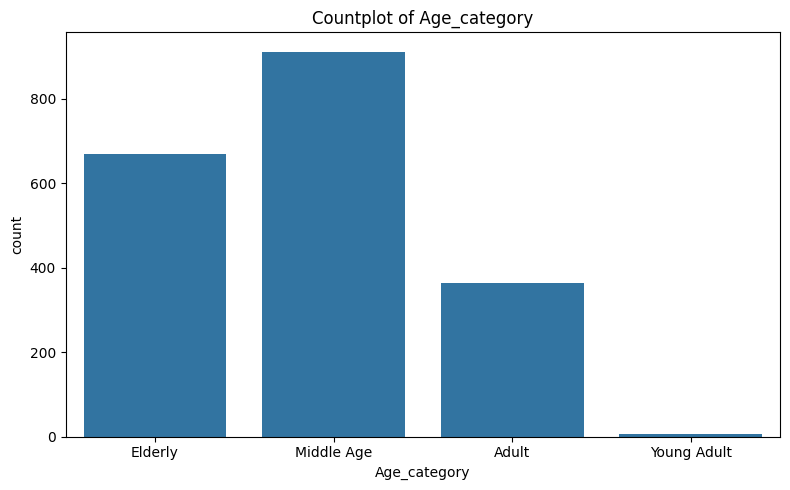

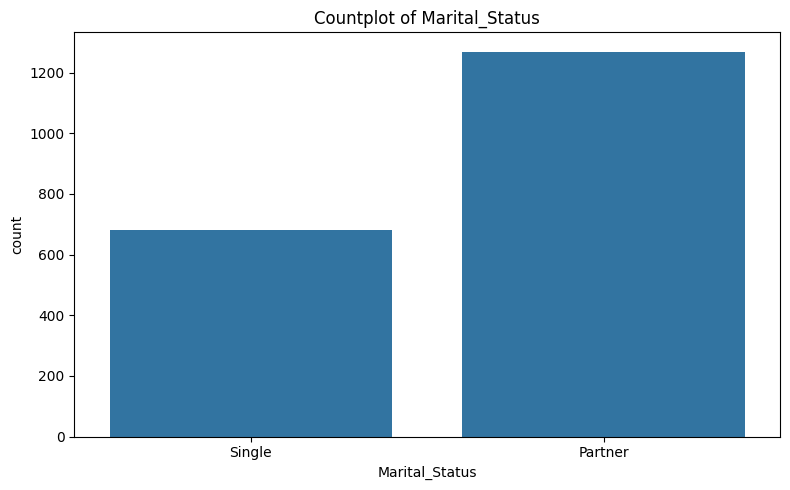

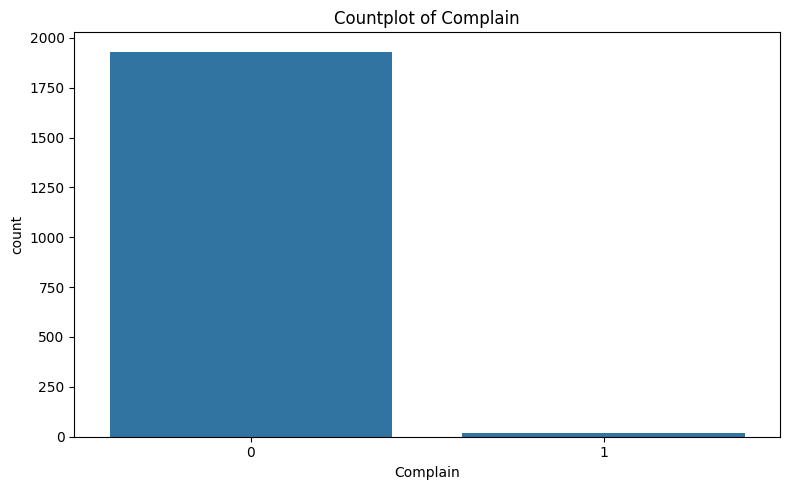

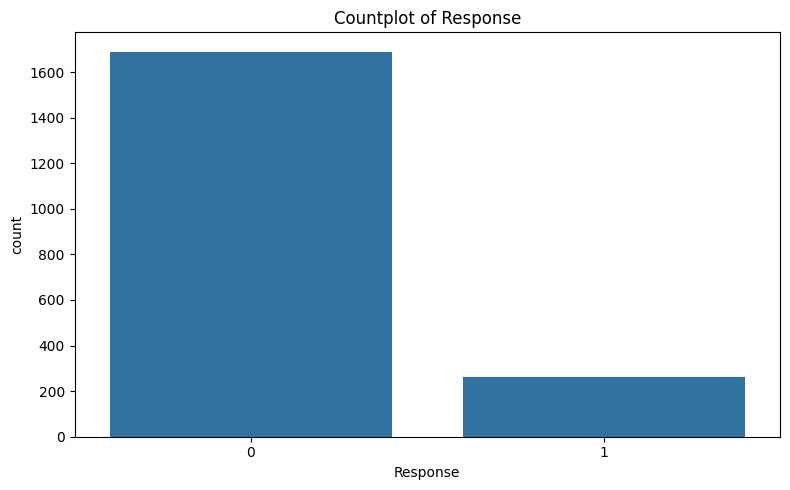

In [68]:
# Vamos plotar o gráfico de contagem das variáveis categóricas

for column in cat_col + bin_col:

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

    plt.tight_layout()
    plt.show()

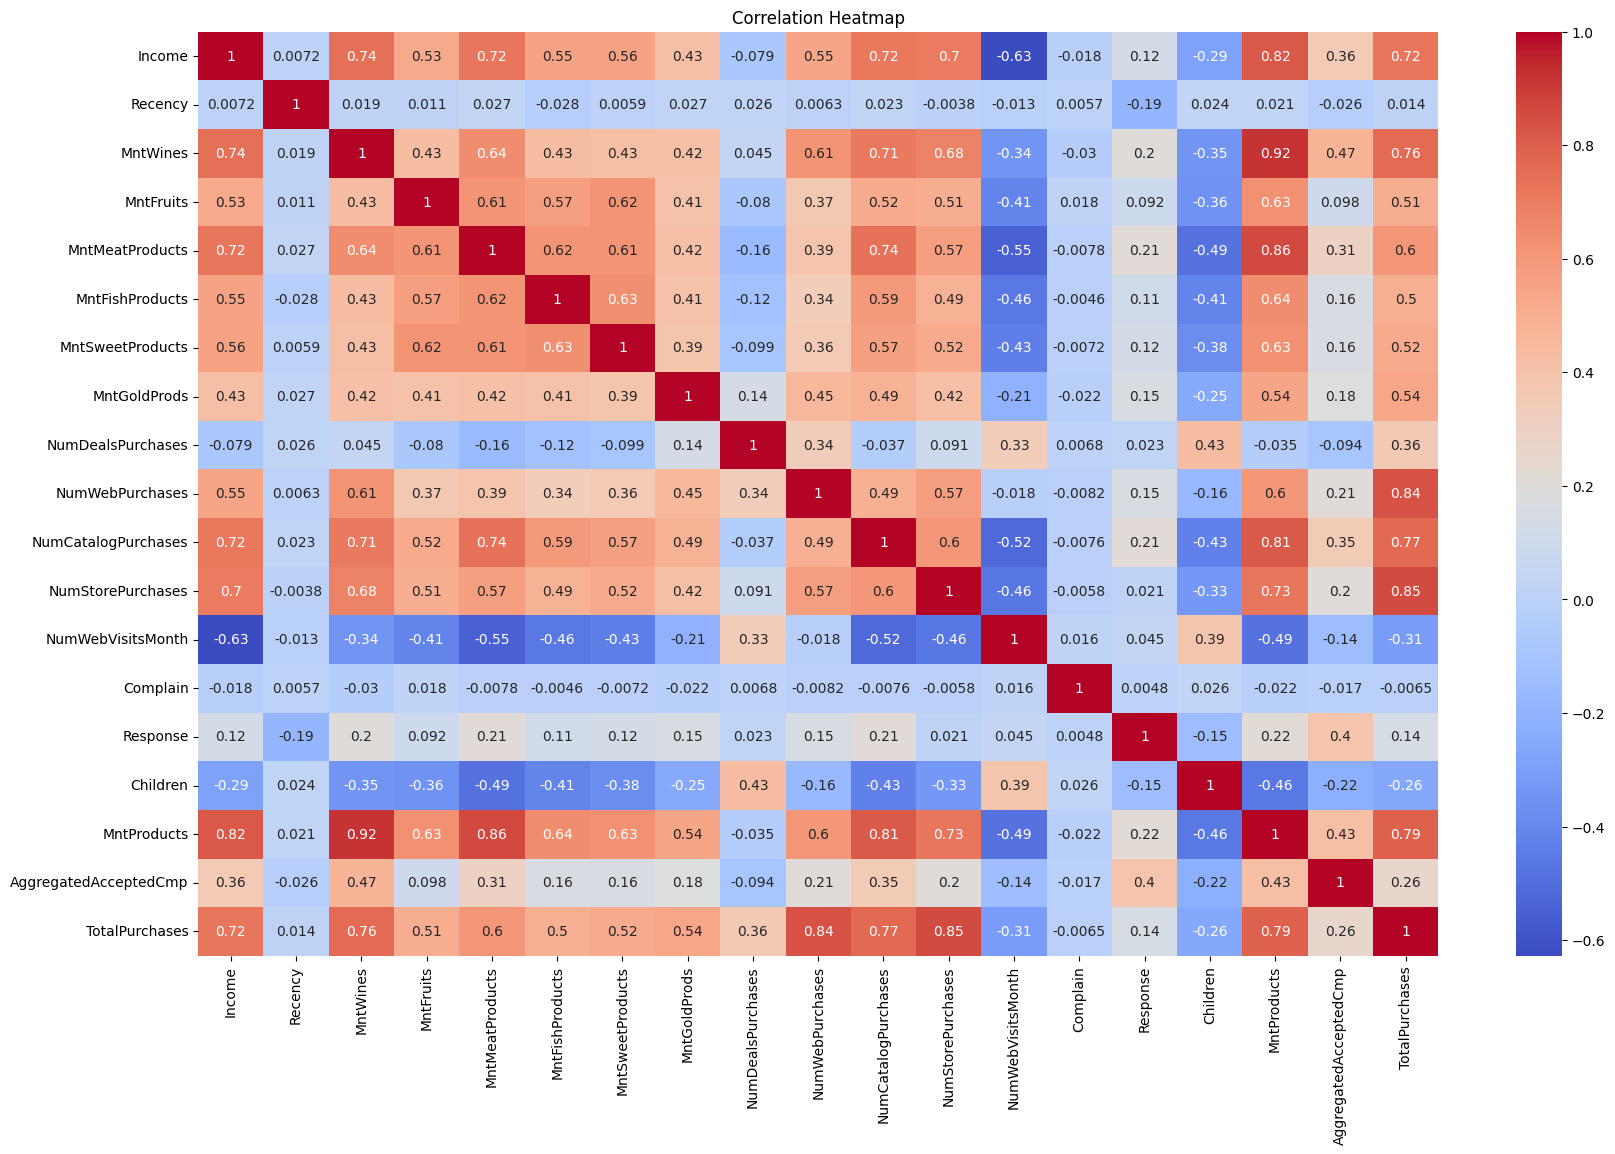

In [69]:
# Agora será realizada a análise de correlação das variáveis.

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Age_category'>

<Axes: xlabel='Income', ylabel='MntWines'>

<Axes: xlabel='Marital_Status'>

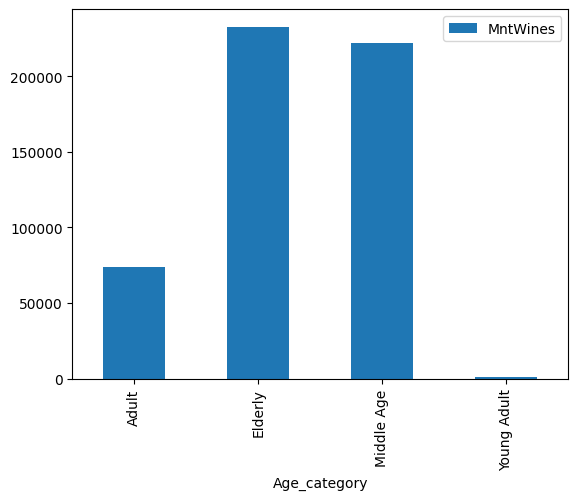

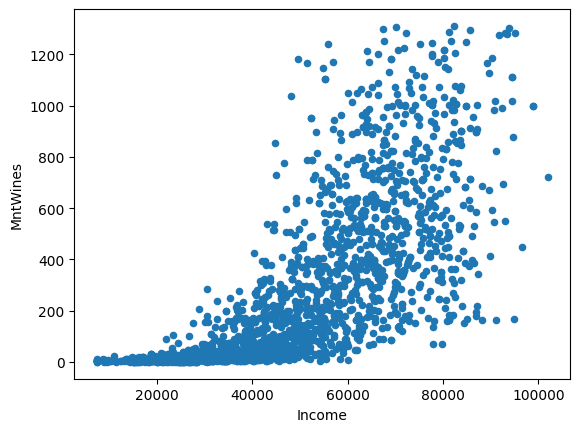

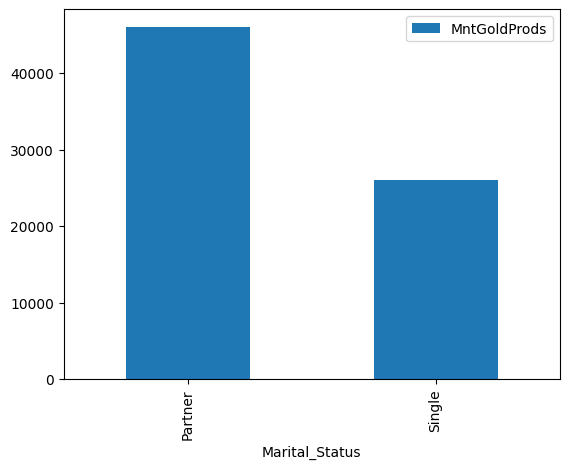

In [70]:
# Vamos plotar os gráficos que ajudarão a responder nossas premissas iniciais

display(df[['MntWines','Age_category']].groupby('Age_category').sum().plot(kind='bar'))
display(df[['MntWines','Income']].plot(kind='scatter', x='Income', y='MntWines'))
display(df[['MntGoldProds','Marital_Status']].groupby('Marital_Status').sum().plot(kind='bar'))

Depois do preprocessamento e da visualização pôde-se entender:

- 'Income' possui uma distribuição próxima da normal sugerindo que a maior parte das pessoas recebe algo próximo da média.

- 'Recency' possui uma distribuição próxima da uniforme o que sugere uma iteratividade estável com a empresa durante a janela de tempo.

- Todas as distruibuições de gastos, incluindo à agregação, sugerem uma distribuição que cresce rapidamente com um valor baixo e logo em seguida vai decrescendo mais suavimente. Isso indica que a maioria dos consumidores não costumam gastar muito.

- Os gráficos das variáveis categóricas indicam que a maioria dos clientes possuem 1 filho, graduação completa, nunca reclamaram , não aceitaram ofertas e são considerados adultos de meia idade.

- O heatmap de correlação indica uma forte correlação da renda com o gasto em produtos, mais especificamente em produtos do tipo carne e vinho.

- Os 3 últimos gráficos confirmam as hípoteses iniciais, ou seja, quanto maior a renda e maior a idade, maiores são os gastos com vinho. E a maiores gastos com ouro são por clientes com parceiros.

#Pré-Processamento

Vamos aplicar one-hot encoding para os dados dados categóricos e vamos padroniza-los  (como a clusterização em si não é escopo do trabalho vamos pular essa parte)

In [71]:
categorical_columns = df.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
print(X_scaled)

[[ 0.45788341  0.30675105  1.13730646 ...  1.38430234 -0.93689225
  -0.06000686]
 [-0.14437998 -0.38380604 -0.81614398 ...  1.38430234 -0.93689225
  -0.06000686]
 [ 1.14598747 -0.79814029  0.48302579 ... -0.72238554  1.0673586
  -0.06000686]
 ...
 [ 0.39880094  1.44617025  1.99194103 ... -0.72238554 -0.93689225
  -0.06000686]
 [ 1.02506499 -1.41964167  0.48928685 ...  1.38430234 -0.93689225
  -0.06000686]
 [ 0.18882069 -0.31475033 -0.58761532 ...  1.38430234 -0.93689225
  -0.06000686]]


Ao final seria feito à clusterização para agrupar os clientes em diferentes grupos e assim poder definir estratégias para aquele grupo alvo.